# Assignment03 : K-means clustering
# Name : Jun-ha Lee
# Student ID : 2017220159
# github : https://github.com/myosoo/Assignment03.git

# numpy, matplotlib, random, pandas, copy 패키지를 불러온다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import copy

# pandas를 이용해 임의의 2D-dataset을 만든다

In [2]:
data = pd.DataFrame({
    'x':[1,2,58,6,44,5,14,15,10,6,11,15,7,2,19,18,25,33,21,43,44,44,53,54,55,59,60,61,62,65,64,65,70,74,73,72,77,80,99,59,70],
    'y':[56, 22,60,31,38,80,39,70,95,39,36,89,99,30,52,46,55,59,63,70,66,63,58,23,14,8,19,7,24,15,16,20,8,32,11,6,5,25,18,22,34]
})

# cluster k의 수를 정해주고 임의의 centroid를 k의 갯수 만큼 생성한다

In [3]:
np.random.seed()
k = 2
centroids = {
    i+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for i in range(k)
}

# 그래프로 2D-dataset과 k개의 centroid를 표시한다 

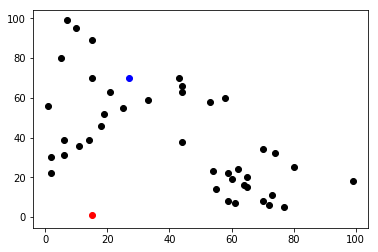

In [4]:
fig = plt.figure(1)
plt.scatter(data['x'], data['y'], color='k')
colmap = {1: 'r', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

# EuclideanDistance로 dataset에서 각각의 centroid까지의 거리를 구한 후 dataset을 거리가 가까운 centroid에 labeling한다
$Eucilean Distance =$$\sqrt{(x-x_{centroid})^2 + (y-y_{centroid})^2}$


In [5]:
def EuclideanDistance(data, centroids):
    for i in centroids.keys():
        data['E.D from Centroid{}'.format(i)] = (
            np.sqrt((data['x'] - centroids[i][0]) ** 2 + (data['y'] - centroids[i][1]) ** 2)
        )
    centroid_distance_cols = ['E.D from Centroid{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:, centroid_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('E.D from Centroid')))
    data['color'] = data['closest'].map(lambda x: colmap[x])
    return data

data = EuclideanDistance(data, centroids)
print(data.head())

    x   y  E.D from Centroid1  E.D from Centroid2  closest color
0   1  56           56.753854           29.529646        2     b
1   2  22           24.698178           54.120237        1     r
2  58  60           73.006849           32.572995        2     b
3   6  31           31.320920           44.294469        1     r
4  44  38           47.010637           36.235342        2     b


# Euclidean distance로 labeling된 dataset를 그래프로 표시한다

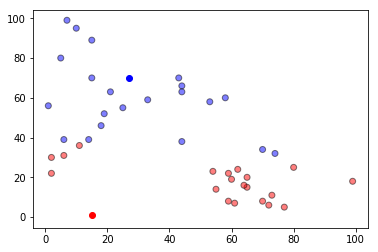

In [6]:
fig = plt.figure(1)
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

# 첫 번째 iteration에서 labeling된 각각의 dataset의 평균으로 새로운 centroid를 계산한다

In [7]:
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['x'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['y'])
    return k

centroids = update(centroids)

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0])
    dy = (centroids[i][1] - old_centroids[i][1])

# 새롭게 계산된 centroid를 그래프로 표시한다 

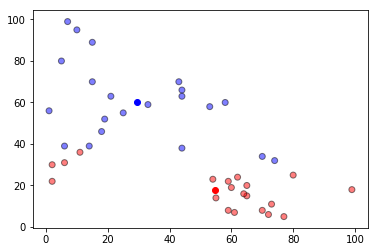

In [8]:
fig = plt.figure(1)
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
plt.show()

# centorid가 더 이상 변하지 않을 때까지 iteration을 한다

In [9]:
while True:
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    data = EuclideanDistance(data, centroids)
    if closest_centroids.equals(data['closest']):
        break

# iteration이 멈추면 labeling된 dataset을 그래프로 표시한다

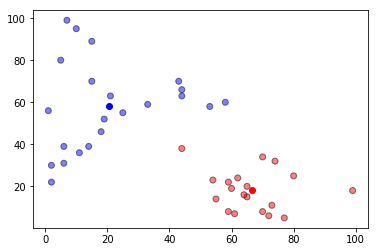

In [10]:
fig = plt.figure(1)
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()